# Explore here

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [2]:
#Load data
raw_ds = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

In [3]:
# configuration for pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.reset_option('all')

/tmp/ipykernel_1925/406830732.py:5: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [4]:
#Seeing the data
raw_ds

fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964  25213   
2                    11.896628   3268                 13.134520   3201   
3                    11.589286   3029                 13.522321   3113   
4                    13.087828   6742                 11.656293   6884   
...                        ...    ...                       ...    ...   
3135                 14.694200   5359                 12.448027   6577   
3136                  9.466661   2967                 12.854729   4093   
3137                 15.788955   2153                 10.606434   2702   
3138                 14.115409    715                  9.067850    903   
3139                 11.181283    681                  9.774652    906   

      30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                    12.749771  ...         3644                 12.9   
1                    11.564429  ...        14692                 12.0   
2                    12.865239  ...         2373                 19.7   
3                    13.897321  ...         1789                 14.1   
4                    11.901798  ...         4661                 13.5   
...                        ...  ...          ...                  ...   
3135                 15.277229  ...         2098                  8.9   
3136                 17.733200  ...          928                  7.2   
3137                 13.311001  ...         1163                 10.4   
3138                 11.452124  ...          506                 11.3   
3139                 13.004162  ...          480                 11.7   

      diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                      11.9                   13.8             5462   
1                      11.0                   13.1            20520   
2                      18.6                   20.6             3870   
3                      13.2                   14.9             2511   
4                      12.6                   14.5             6017   
...                     ...                    ...              ...   
3135                    8.3                    9.6             2834   
3136                    6.5                    8.0             1360   
3137                    9.5                   11.2             1500   
3138                   10.3                   12.1              686   
3139                   10.7                   12.7              644   

      CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0                3.1               2.9               3.3        1326   
1                3.2               3.0               3.5        5479   
2                4.5               4.2               4.8         887   
3                3.3               3.1               3.6         595   
4                3.4               3.2               3.7        1507   
...              ...               ...               ...         ...   
3135             2.6               2.4               2.8         821   
3136             2.4               2.2               2.

In [5]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [6]:
#Target 'anycondition_prevalence'

In [7]:
for colunm in raw_ds:
    print(colunm)
    

fips
TOT_POP
0-9
0-9 y/o % of total pop
19-Oct
10-19 y/o % of total pop
20-29
20-29 y/o % of total pop
30-39
30-39 y/o % of total pop
40-49
40-49 y/o % of total pop
50-59
50-59 y/o % of total pop
60-69
60-69 y/o % of total pop
70-79
70-79 y/o % of total pop
80+
80+ y/o % of total pop
White-alone pop
% White-alone
Black-alone pop
% Black-alone
Native American/American Indian-alone pop
% NA/AI-alone
Asian-alone pop
% Asian-alone
Hawaiian/Pacific Islander-alone pop
% Hawaiian/PI-alone
Two or more races pop
% Two or more races
POP_ESTIMATE_2018
N_POP_CHG_2018
GQ_ESTIMATES_2018
R_birth_2018
R_death_2018
R_NATURAL_INC_2018
R_INTERNATIONAL_MIG_2018
R_DOMESTIC_MIG_2018
R_NET_MIG_2018
Less than a high school diploma 2014-18
High school diploma only 2014-18
Some college or associate's degree 2014-18
Bachelor's degree or higher 2014-18
Percent of adults with less than a high school diploma 2014-18
Percent of adults with a high school diploma only 2014-18
Percent of adults completing some college 

Doing correlation to see which columns will be delete

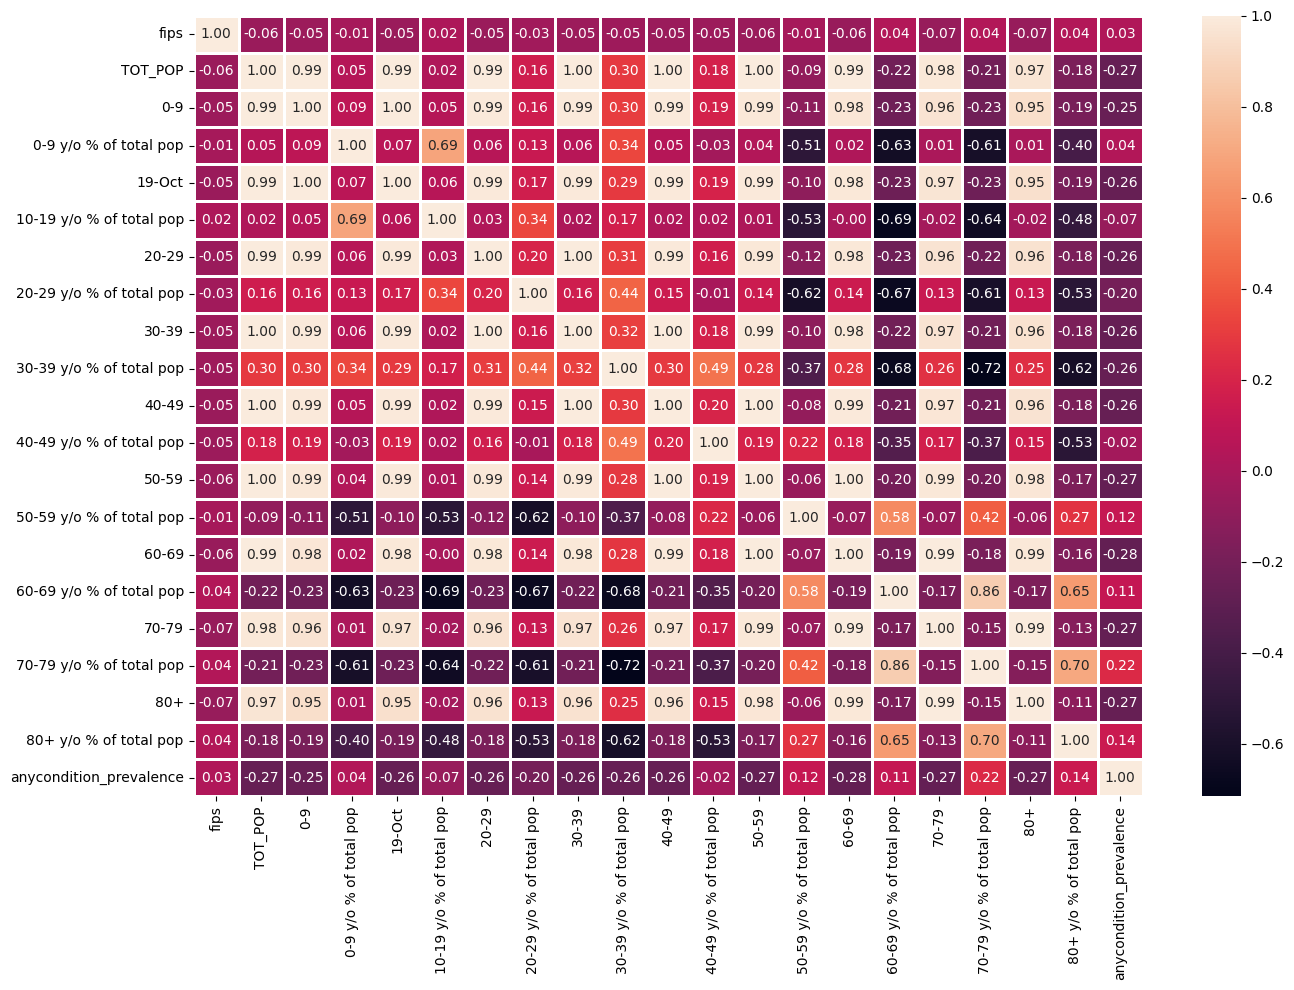

In [8]:

fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['fips','TOT_POP','0-9','0-9 y/o % of total pop','19-Oct','10-19 y/o % of total pop','20-29','20-29 y/o % of total pop','30-39','30-39 y/o % of total pop','40-49','40-49 y/o % of total pop','50-59','50-59 y/o % of total pop','60-69','60-69 y/o % of total pop','70-79','70-79 y/o % of total pop','80+','80+ y/o % of total pop','anycondition_prevalence']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#age

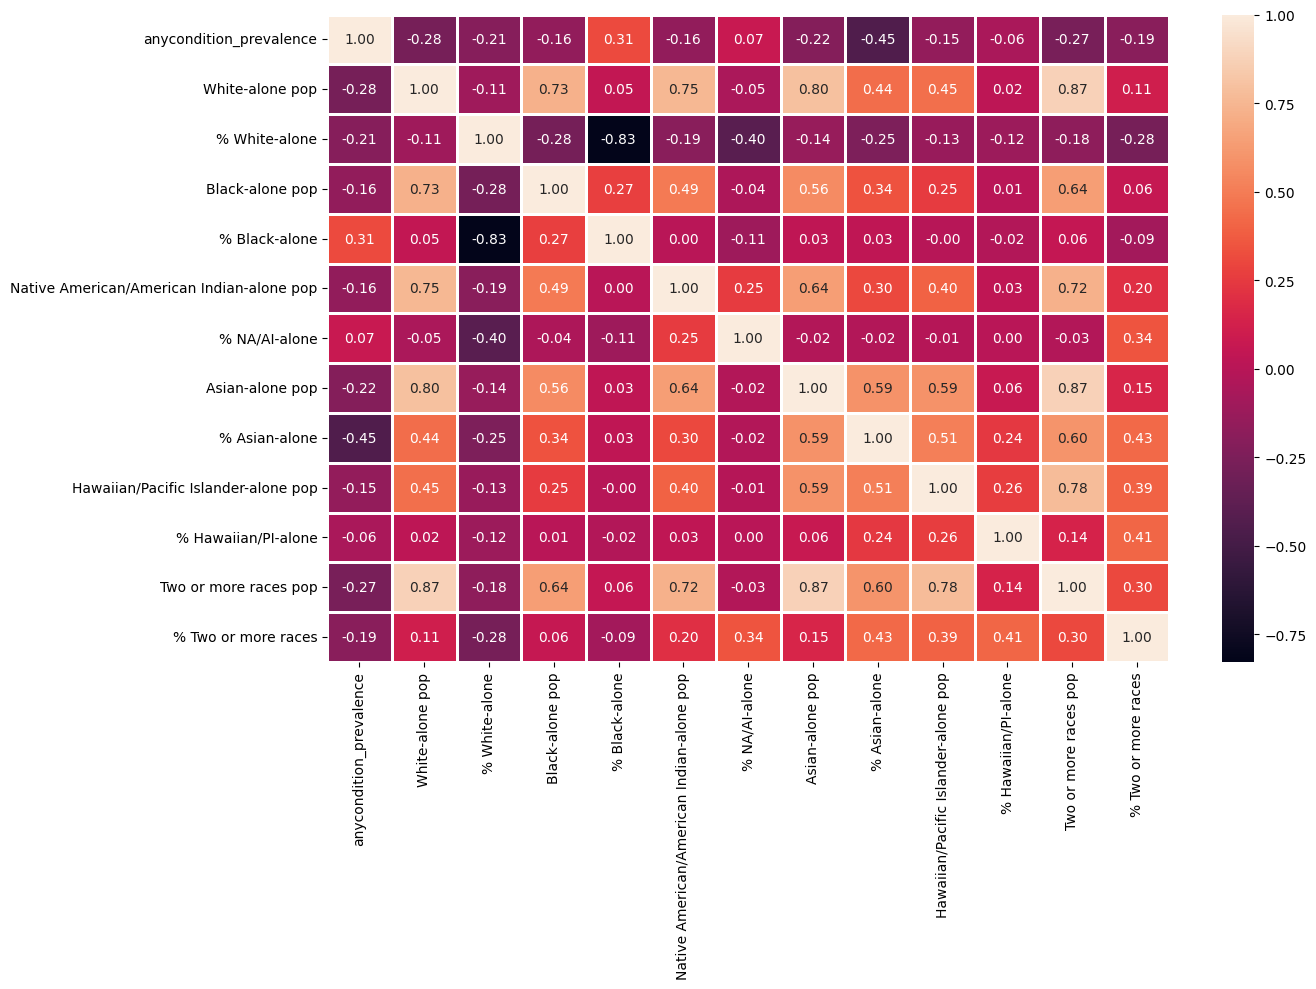

In [9]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','White-alone pop','% White-alone','Black-alone pop','% Black-alone','Native American/American Indian-alone pop','% NA/AI-alone','Asian-alone pop','% Asian-alone','Hawaiian/Pacific Islander-alone pop','% Hawaiian/PI-alone', 'Two or more races pop','% Two or more races']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#races

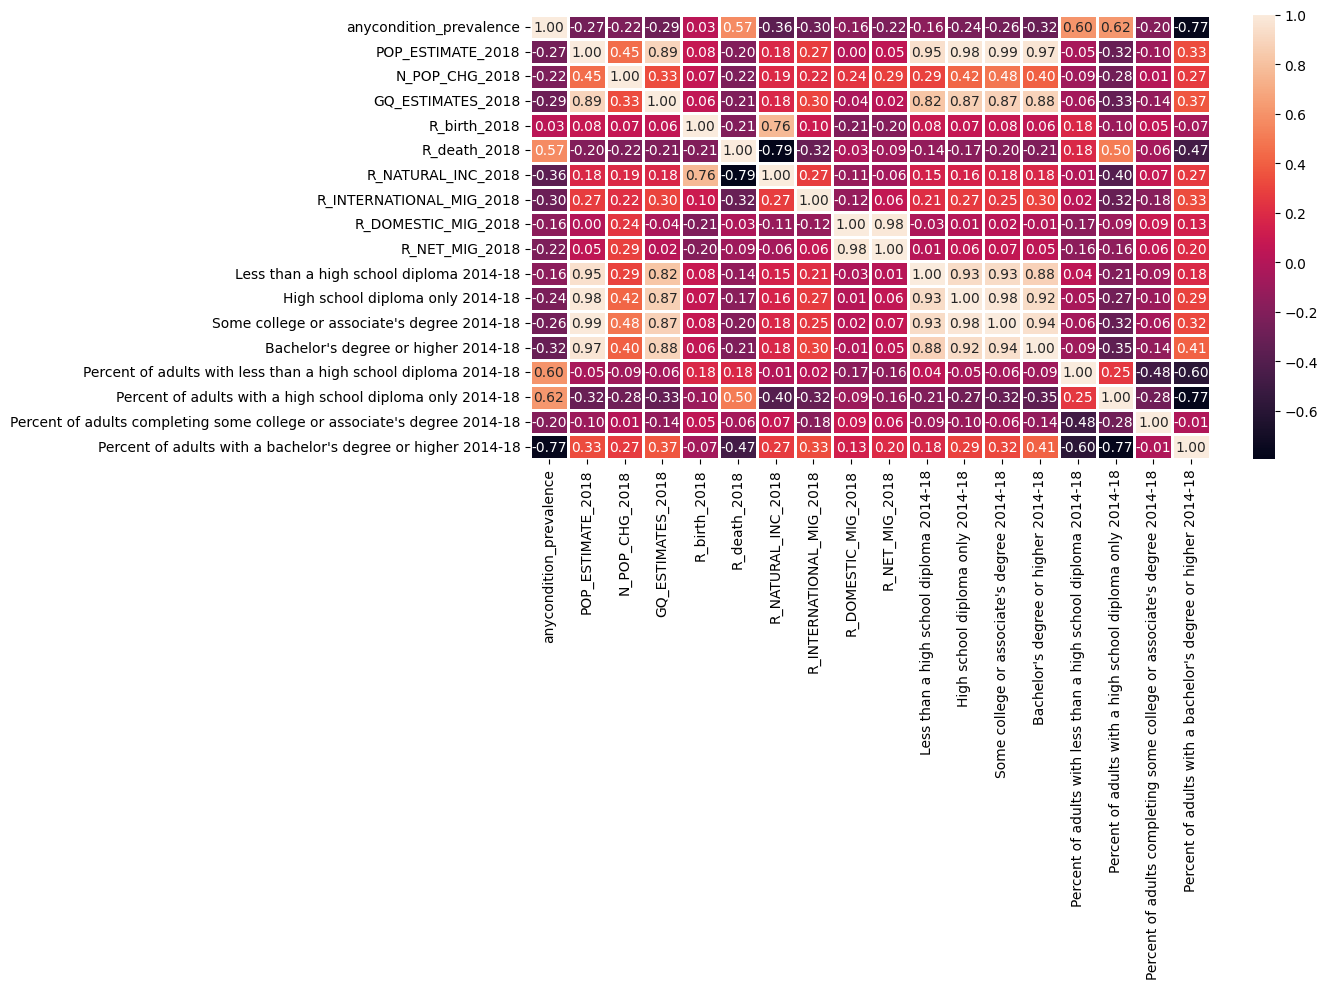

In [10]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018','Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', 'Percent of adults completing some college or associate\'s degree 2014-18', 'Percent of adults with a bachelor\'s degree or higher 2014-18']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#studies


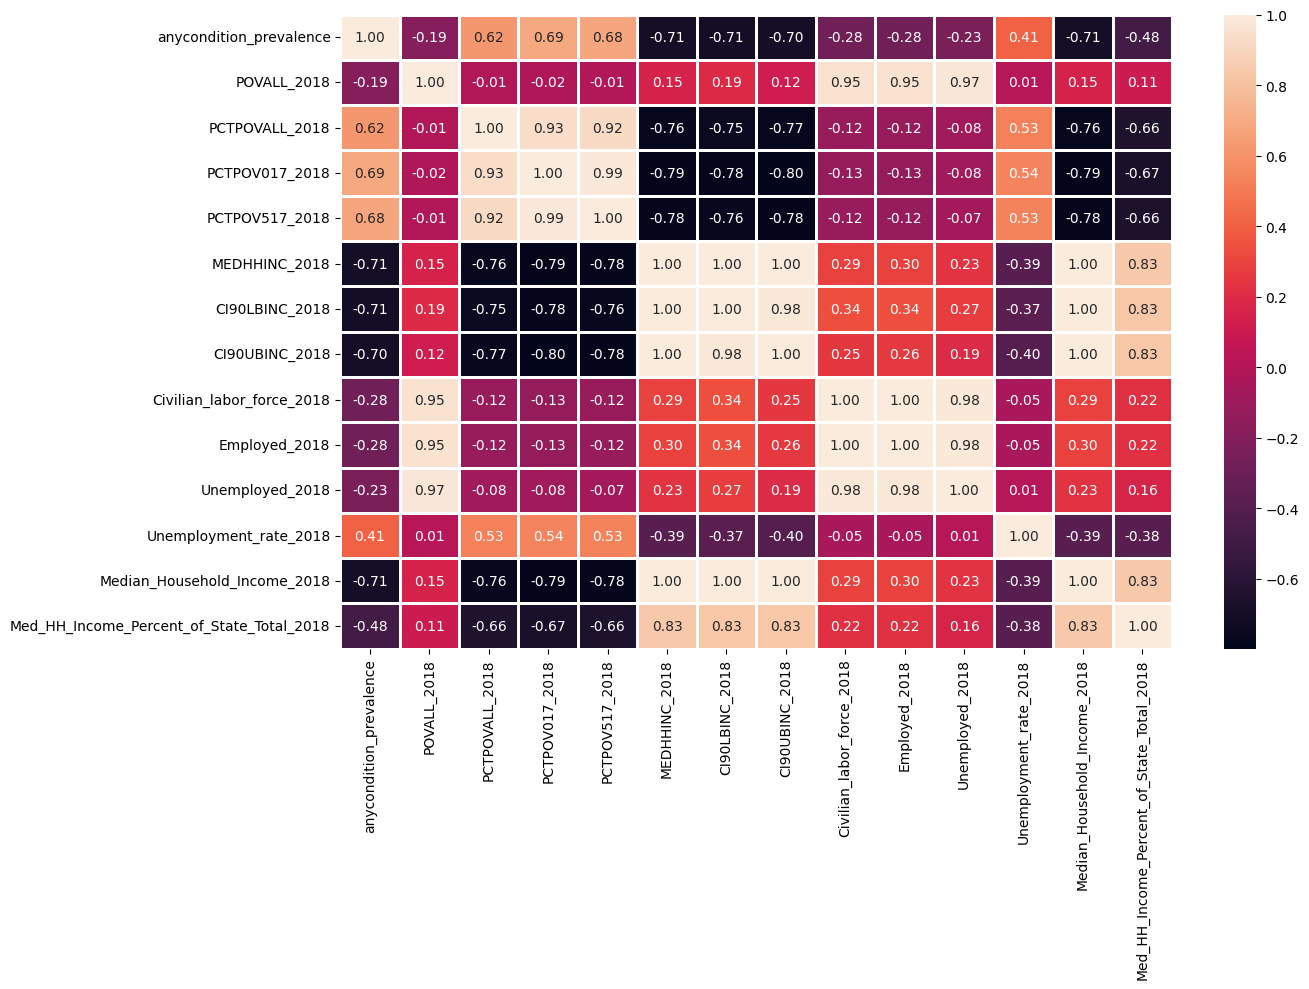

In [11]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','POVALL_2018', 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Unemployment_rate_2018', 'Median_Household_Income_2018', 'Med_HH_Income_Percent_of_State_Total_2018']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#poverty

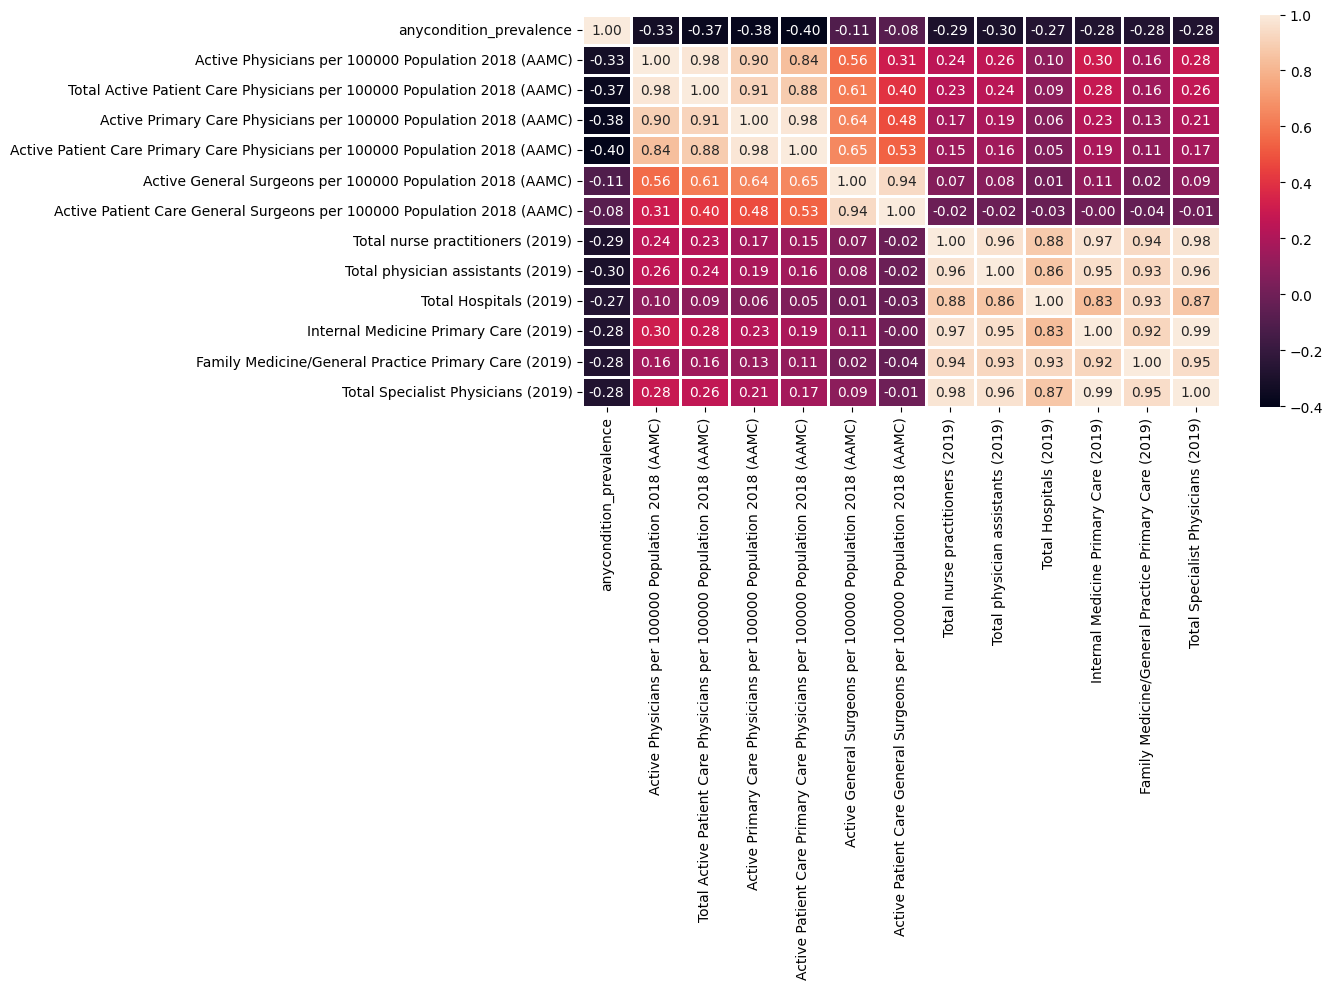

In [12]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#Health

In [13]:
# Select columns with strings
columnas_con_strings = raw_ds.select_dtypes(include='object').columns
columnas_con_strings


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [14]:
#factorze the columns with strings
raw_ds['COUNTY_NAME_n'] = pd.factorize(raw_ds['COUNTY_NAME'])[0]
raw_ds['STATE_NAME_n'] = pd.factorize(raw_ds['STATE_NAME'])[0]

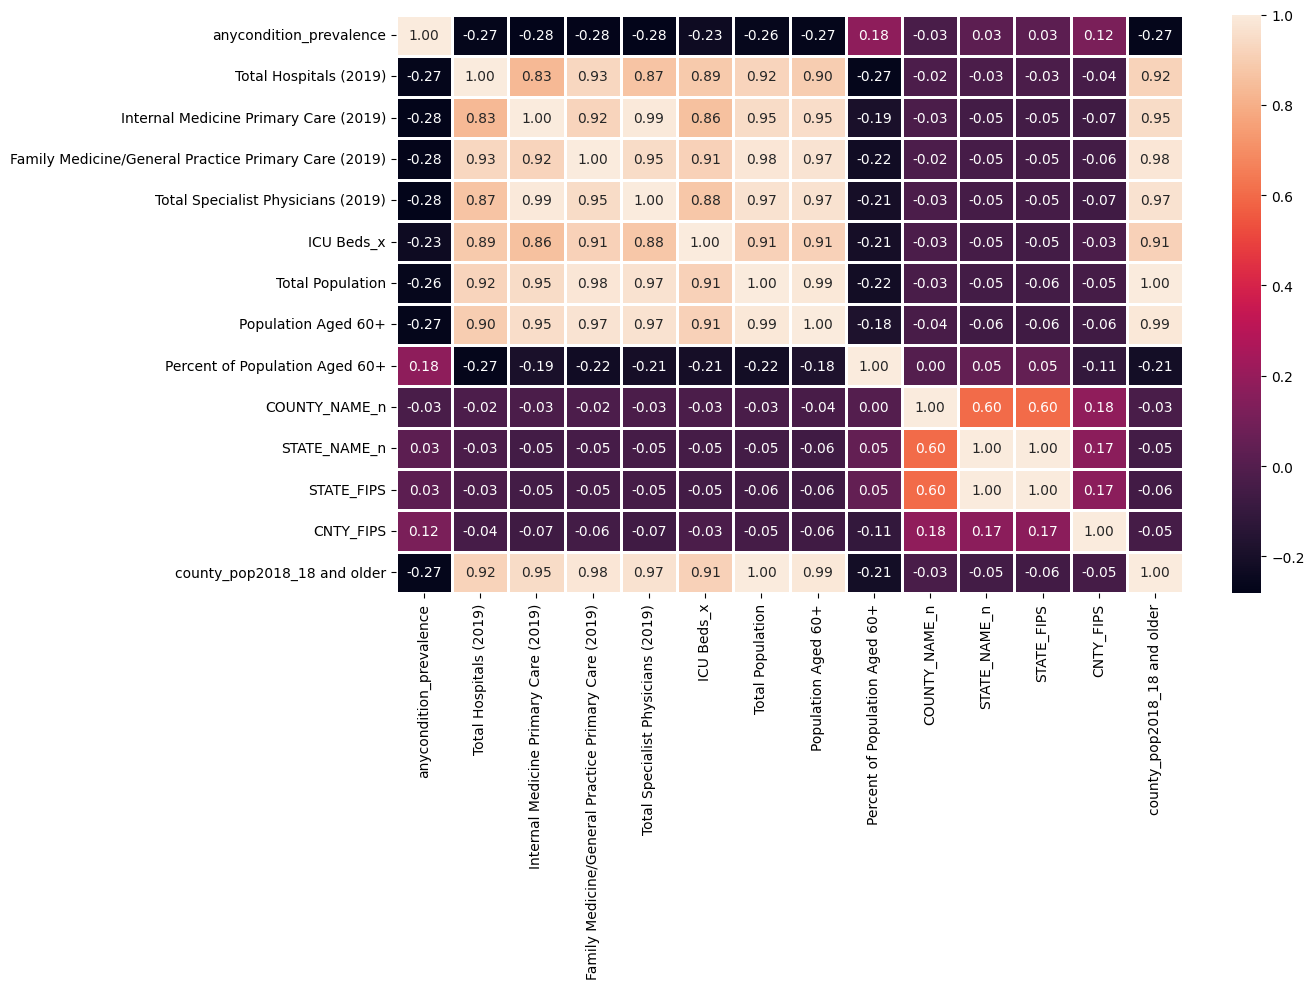

In [15]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'Percent of Population Aged 60+', 'COUNTY_NAME_n', 'STATE_NAME_n', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and older']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()

plt.show()
#hospitals and contry name

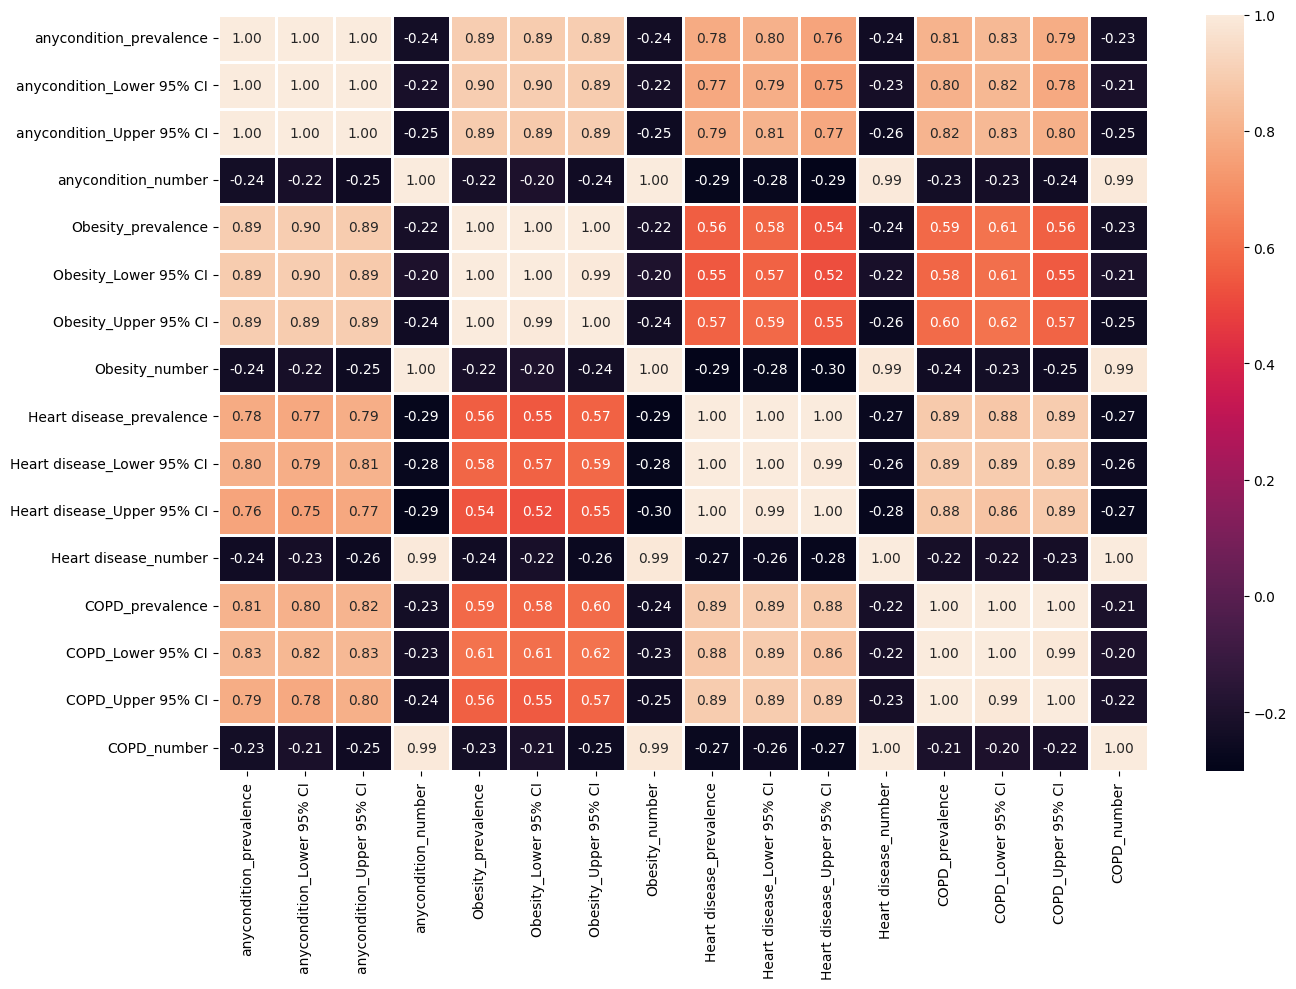

In [16]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'anycondition_number', 'Obesity_prevalence', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Obesity_number', 'Heart disease_prevalence', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'Heart disease_number', 'COPD_prevalence', 'COPD_Lower 95% CI', 'COPD_Upper 95% CI', 'COPD_number']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()
#any condition prevalence

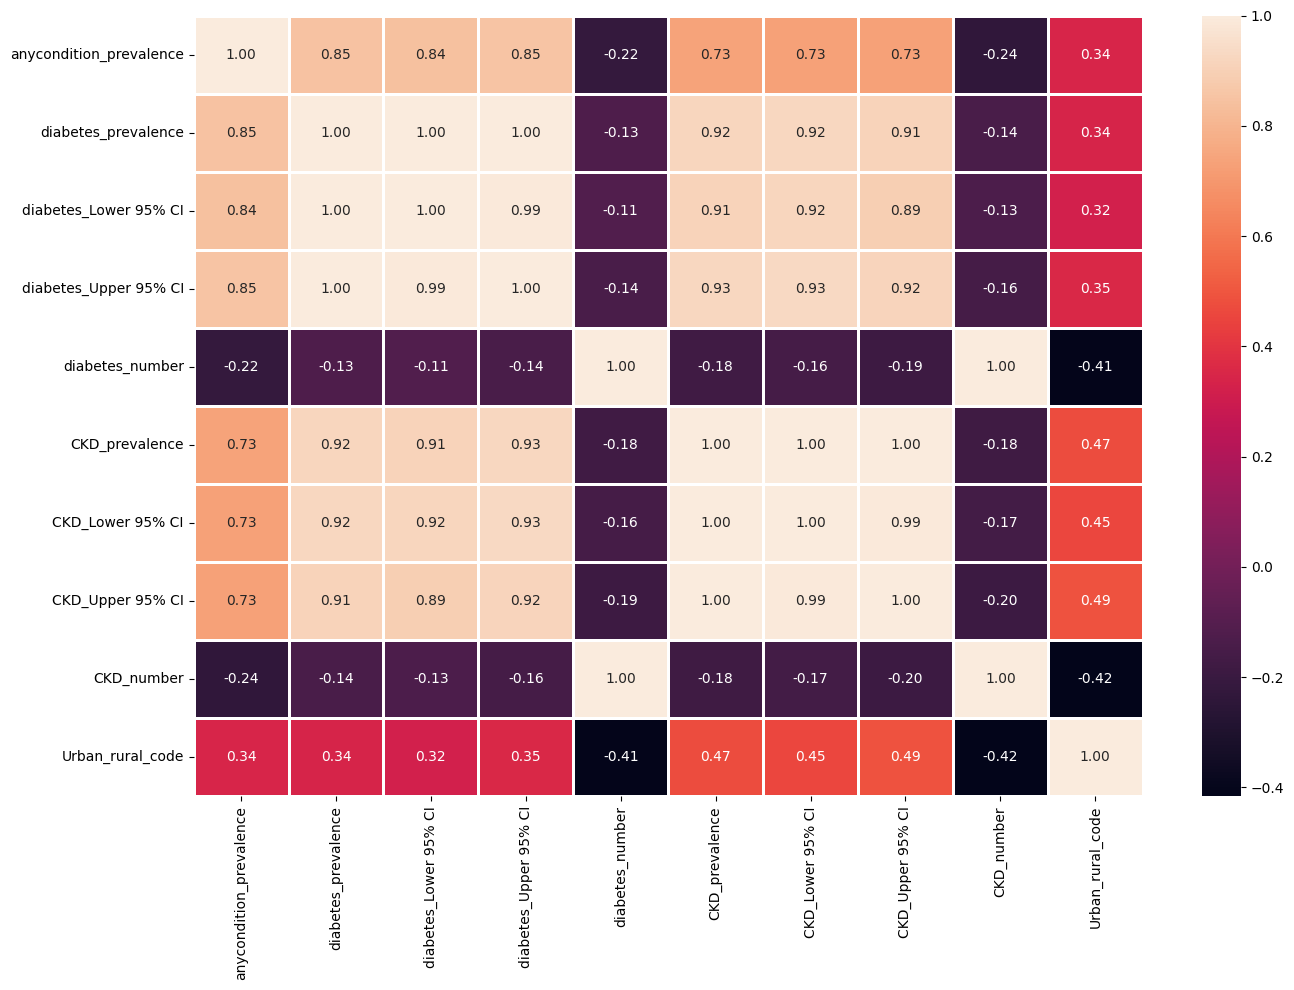

In [17]:
fig, axis = plt.subplots(figsize = (14, 10))

sns.heatmap(raw_ds[['anycondition_prevalence','diabetes_prevalence', 'diabetes_Lower 95% CI', 'diabetes_Upper 95% CI', 'diabetes_number', 'CKD_prevalence', 'CKD_Lower 95% CI', 'CKD_Upper 95% CI', 'CKD_number', 'Urban_rural_code']].corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()
#any condition prevalence 2

Filtering data

In [18]:
#dropping unnecessary variables
raw_ds.drop(['POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'R_birth_2018', 'GQ_ESTIMATES_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'STATE_FIPS', 'CNTY_FIPS', 'fips', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18', 'POVALL_2018','Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active General Surgeons per 100000 Population 2018 (AAMC)', 'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)', 'Total nurse practitioners (2019)', 'Total physician assistants (2019)', 'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)', 'Family Medicine/General Practice Primary Care (2019)', 'Total Specialist Physicians (2019)', 'Percent of Population Aged 60+', 'COUNTY_NAME_n', 'STATE_NAME_n', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and older','COUNTY_NAME', 'STATE_NAME','anycondition_number','Obesity_number', 'Heart disease_number', 'COPD_number','diabetes_number', 'CKD_number'], axis = 1, inplace = True)


In [19]:
raw_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 67 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   TOT_POP                                                                  3140 non-null   int64  
 1   0-9                                                                      3140 non-null   int64  
 2   0-9 y/o % of total pop                                                   3140 non-null   float64
 3   19-Oct                                                                   3140 non-null   int64  
 4   10-19 y/o % of total pop                                                 3140 non-null   float64
 5   20-29                                                                    3140 non-null   int64  
 6   20-29 y/o % of total pop                                                

In [20]:
clean_data = raw_ds

In [21]:
clean_data.describe()

TOT_POP           0-9  0-9 y/o % of total pop        19-Oct  \
count  3.140000e+03  3.140000e+03             3140.000000  3.140000e+03   
mean   1.041894e+05  1.274030e+04               11.871051  1.336798e+04   
std    3.335834e+05  4.180730e+04                2.124081  4.228439e+04   
min    8.800000e+01  0.000000e+00                0.000000  0.000000e+00   
25%    1.096325e+04  1.280500e+03               10.594639  1.374500e+03   
50%    2.580050e+04  3.057000e+03               11.802727  3.274000e+03   
75%    6.791300e+04  8.097000e+03               12.951840  8.822250e+03   
max    1.010552e+07  1.208253e+06               25.460677  1.239139e+06   

       10-19 y/o % of total pop         20-29  20-29 y/o % of total pop  \
count               3140.000000  3.140000e+03               3140.000000   
mean                  12.694609  1.446933e+04                 12.283979   
std                    1.815044  4.957773e+04                  3.126297   
min                    0.000000  0.000000e+00                  0.000000   
25%                   11.674504  1.263750e+03                 10.496774   
50%                   12.687422  3.108000e+03                 11.772649   
75%                   13.659282  8.976250e+03                 13.182260   
max                   23.304372  1.557073e+06                 37.570198   

              30-39  30-39 y/o % of total pop         40-49  ...  \
count  3.140000e+03               3140.000000  3.140000e+03  ...   
mean   1.391649e+04                 11.751535  1.288521e+04  ...   
std    4.899095e+04                  1.696599  4.347219e+04  ...   
min    1.100000e+01                  6.092789  4.000000e+00  ...   
25%    1.232750e+03                 10.689322  1.245250e+03  ...   
50%    3.000500e+03                 11.580861  3.048500e+03  ...   
75%    8.314250e+03                 12.639379  8.120500e+03  ...   
max    1.501844e+06                 22.225129  1.350076e+06  ...   

       COPD_prevalence  COPD_Lower 95% CI  COPD_Upper 95% CI  \
count      3140.000000        3140.000000        3140.000000   
mean          9.095223           7.835096          10.438567   
std           2.344965           2.088071           2.613920   
min           3.500000           2.900000           4.200000   
25%           7.300000           6.300000           8.500000   
50%           8.900000           7.700000          10.300000   
75%          10.600000           9.200000          12.100000   
max          19.900000          17.700000          22.100000   

       diabetes_prevalence  diabetes_Lower 95% CI  diabetes_Upper 95% CI  \
count          3140.000000            3140.000000            3140.000000   
mean             13.073503              12.088089              14.053726   
std               2.724351               2.622948               2.824828   
min               6.100000               5.500000               6.700000   
25%              11.200000              10.300000              12.100000   
50%              12.800000              11.800000              13.800000   
75%              14.800000              13.700000              15.900000   
max              25.600000              24.200000              27.000000   

       CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  Urban_rural_code  
count     3140.000000       3140.000000       3140.000000       3140.000000  
mean         3.446242          3.207516          3.710478          4.635350  
std          0.568059          0.527740          0.613069          1.510447  
min          1.800000          1.700000          1.900000          1.000000  
25%          3.100000          2.900000          3.300000          3.000000  
50%          3.400000          3.200000          3.700000          5.000000  
75%          3.800000          3.500000          4.100000          6.000000  
max          6.200000          5.800000          6.600000          6.000000  

[8 rows x 67 columns]

Since we have a lot of data, let's look at it in parts

In [22]:
mitad1, mitad2, mitad3, mitad4 = np.array_split(clean_data, 4, axis=1)

mitad1['anycondition_prevalence'] = clean_data['anycondition_prevalence']
mitad2['anycondition_prevalence'] = clean_data['anycondition_prevalence']
mitad3['anycondition_prevalence'] = clean_data['anycondition_prevalence']
mitad4['anycondition_prevalence'] = clean_data['anycondition_prevalence']

mitad4.shape

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(3140, 17)

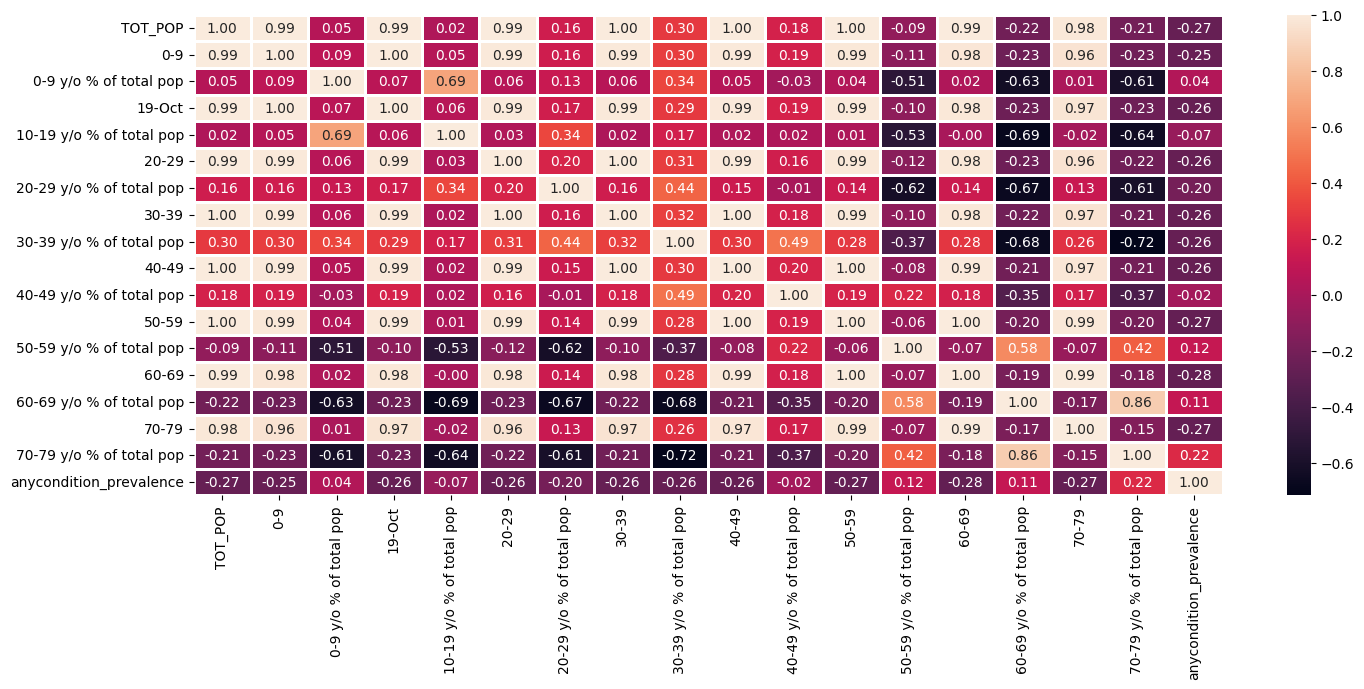

In [23]:
#correlation first half

fig, axis = plt.subplots(figsize = (15, 7))

sns.heatmap((mitad1).corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()

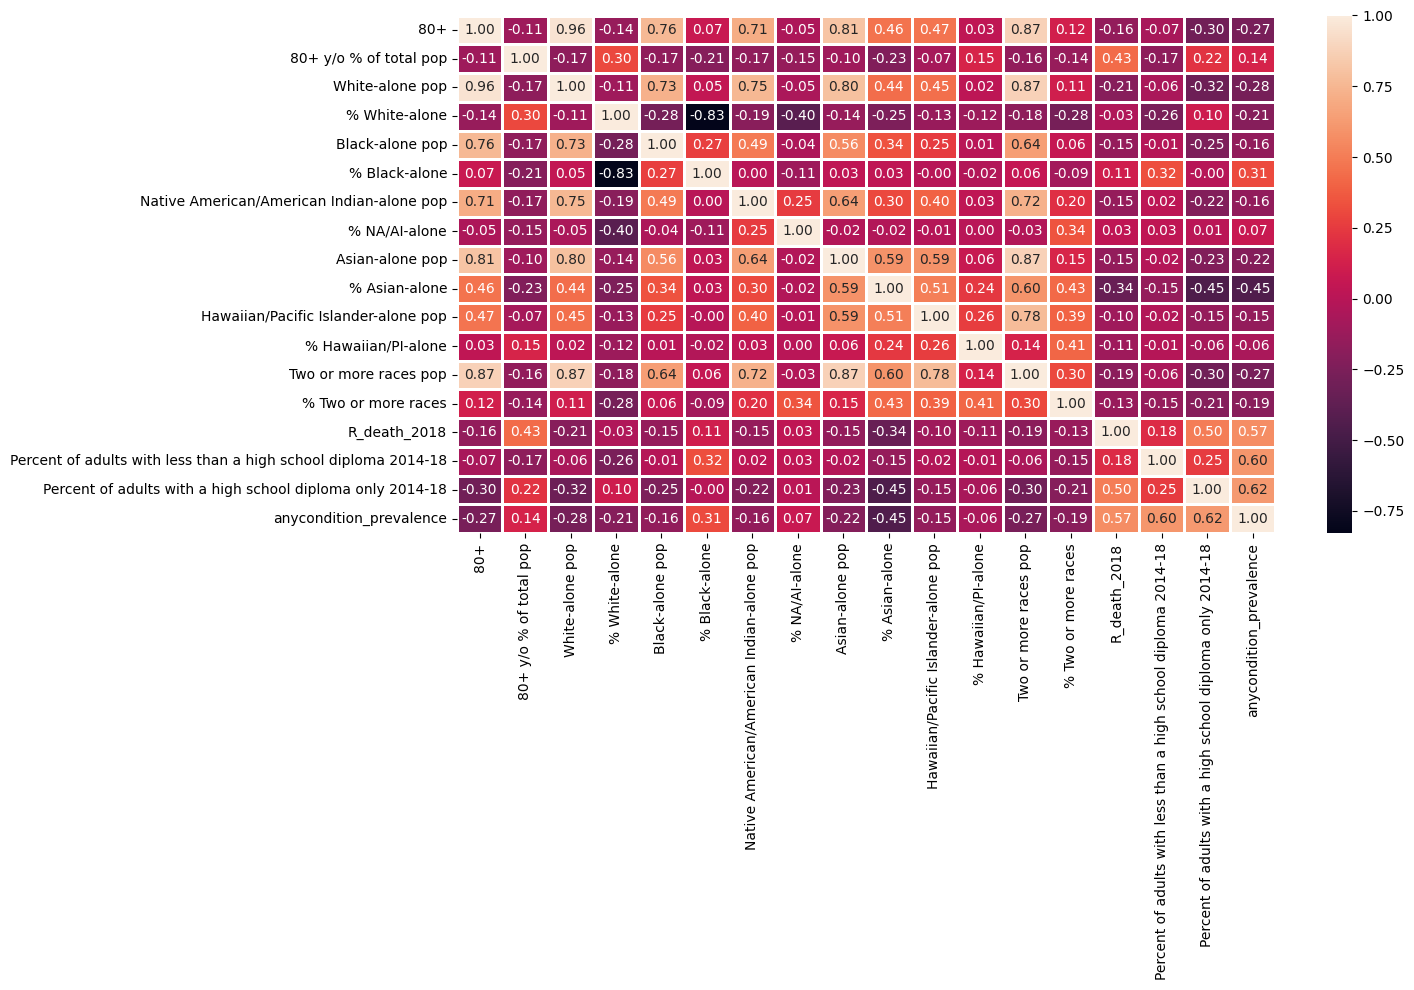

In [24]:
#correlation second half

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((mitad2).corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()

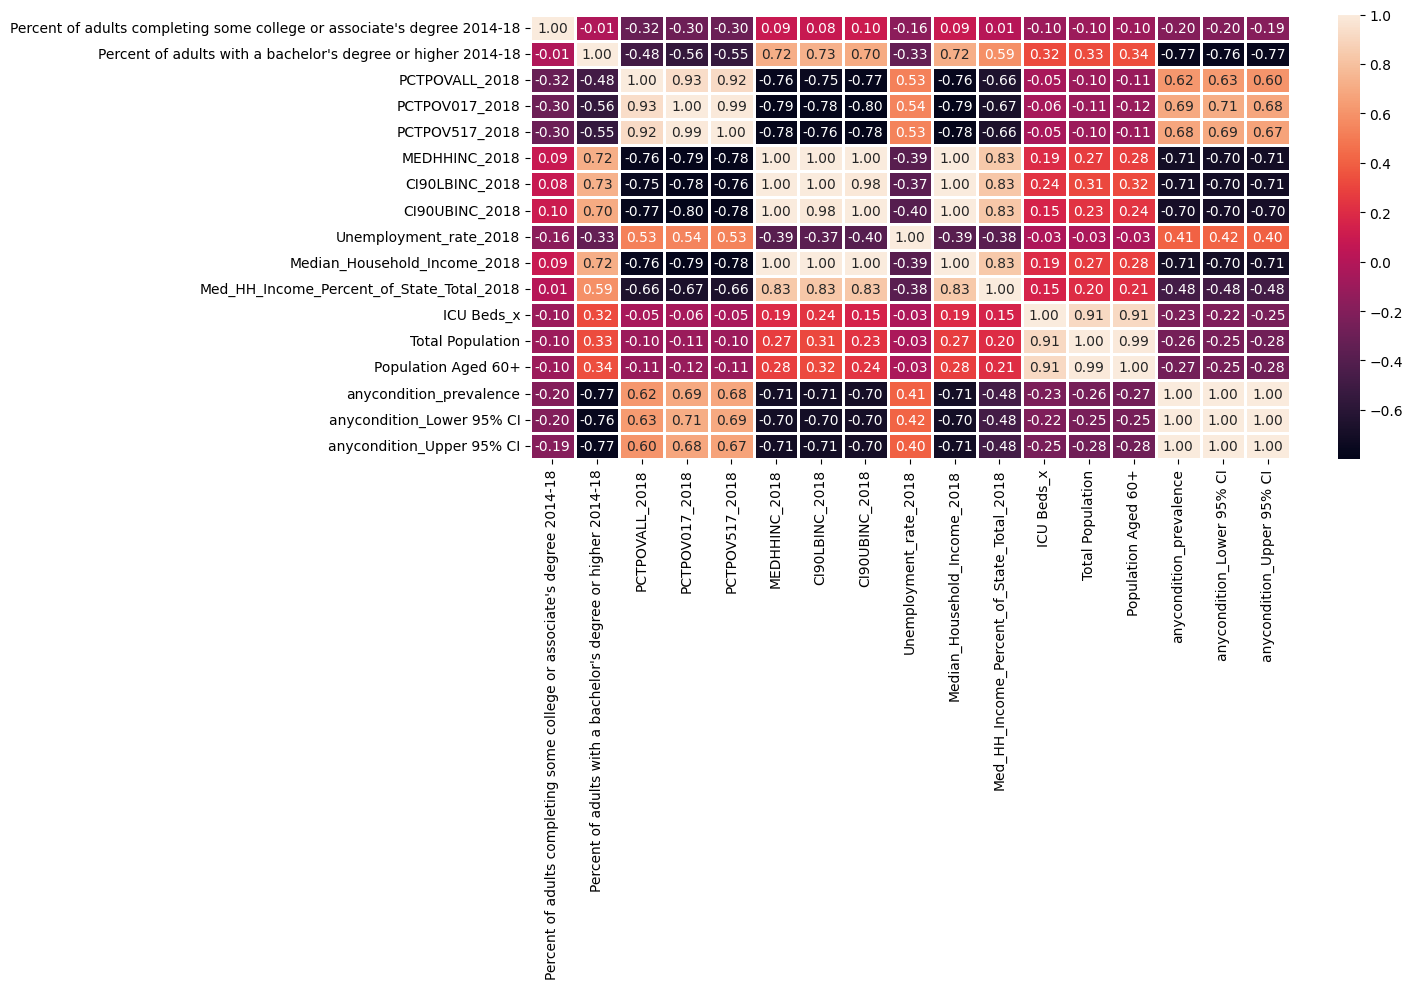

In [25]:
#correlation third half

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((mitad3).corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()

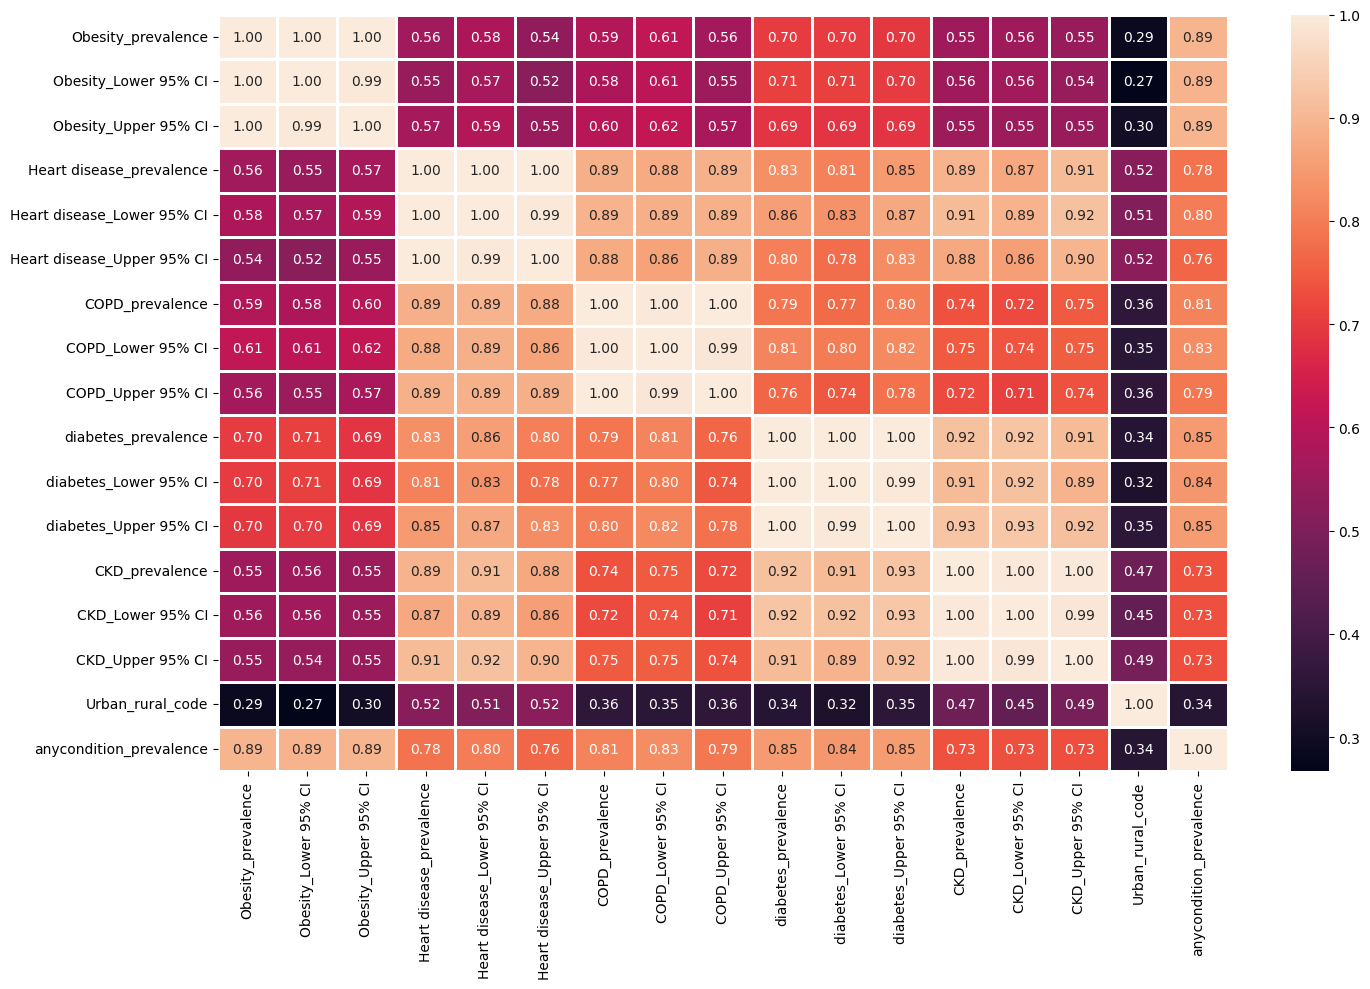

In [26]:
#correlation fourth half

fig, axis = plt.subplots(figsize = (15, 10))

sns.heatmap((mitad4).corr(), annot = True, fmt = ".2f",linecolor='white',linewidths=1)

plt.tight_layout()
plt.show()

Plot analysis

<Axes: >

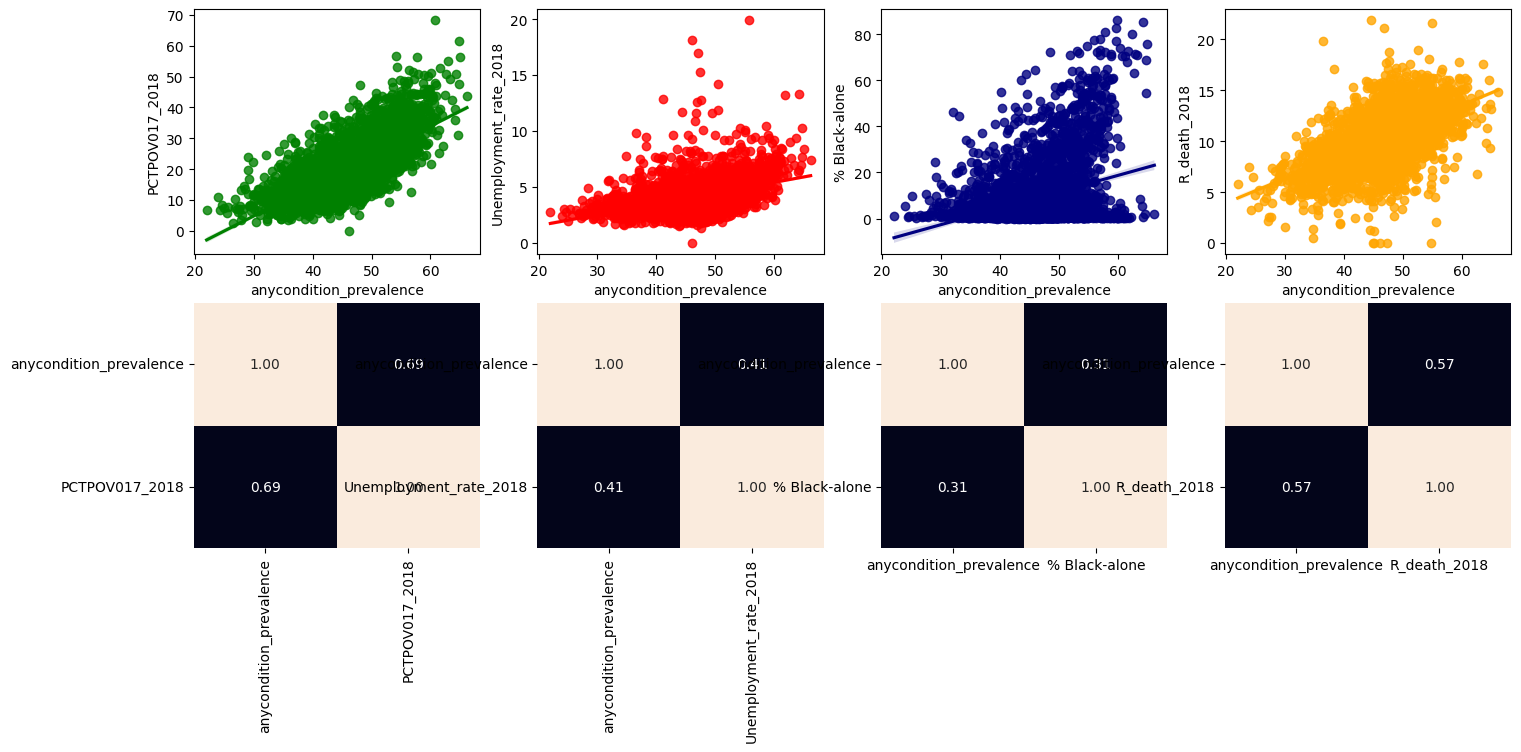

In [27]:
#Numeric-numeric
fig, axis = plt.subplots(2, 4, figsize = (17, 7))

sns.regplot(ax = axis[0, 0], data = clean_data, x = "anycondition_prevalence", y = "PCTPOV017_2018", color='green')
sns.heatmap(clean_data[["anycondition_prevalence", "PCTPOV017_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)


sns.regplot(ax = axis[0, 1], data = clean_data, x = "anycondition_prevalence", y = "Unemployment_rate_2018", color='red')
sns.heatmap(clean_data[["anycondition_prevalence", "Unemployment_rate_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = clean_data, x = "anycondition_prevalence", y = "% Black-alone", color='navy')
sns.heatmap(clean_data[["anycondition_prevalence", "% Black-alone"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = clean_data, x = "anycondition_prevalence", y = "R_death_2018", color='orange')
sns.heatmap(clean_data[["anycondition_prevalence", "R_death_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)



As the correlation plots shows, the variables that are more related to the target are:
- Unemployment, the lack of employment can increase vulnerability to various health conditions, but the relationship is complex.
- % black-alone, it seem that the black race is more prone to suffer any health condition.
- PCTPOV017_2018, the estimated percent of people age 0-17 in poverty. As the unemployment, the poverty seems to be really related with health condition. But as has been pointed out before, it is a very complex issue.
- R_death_2018, the death rate in period 7/1/2017 to 6/30/2018. Is clearly related to any condition prevalence. 

<Axes: >

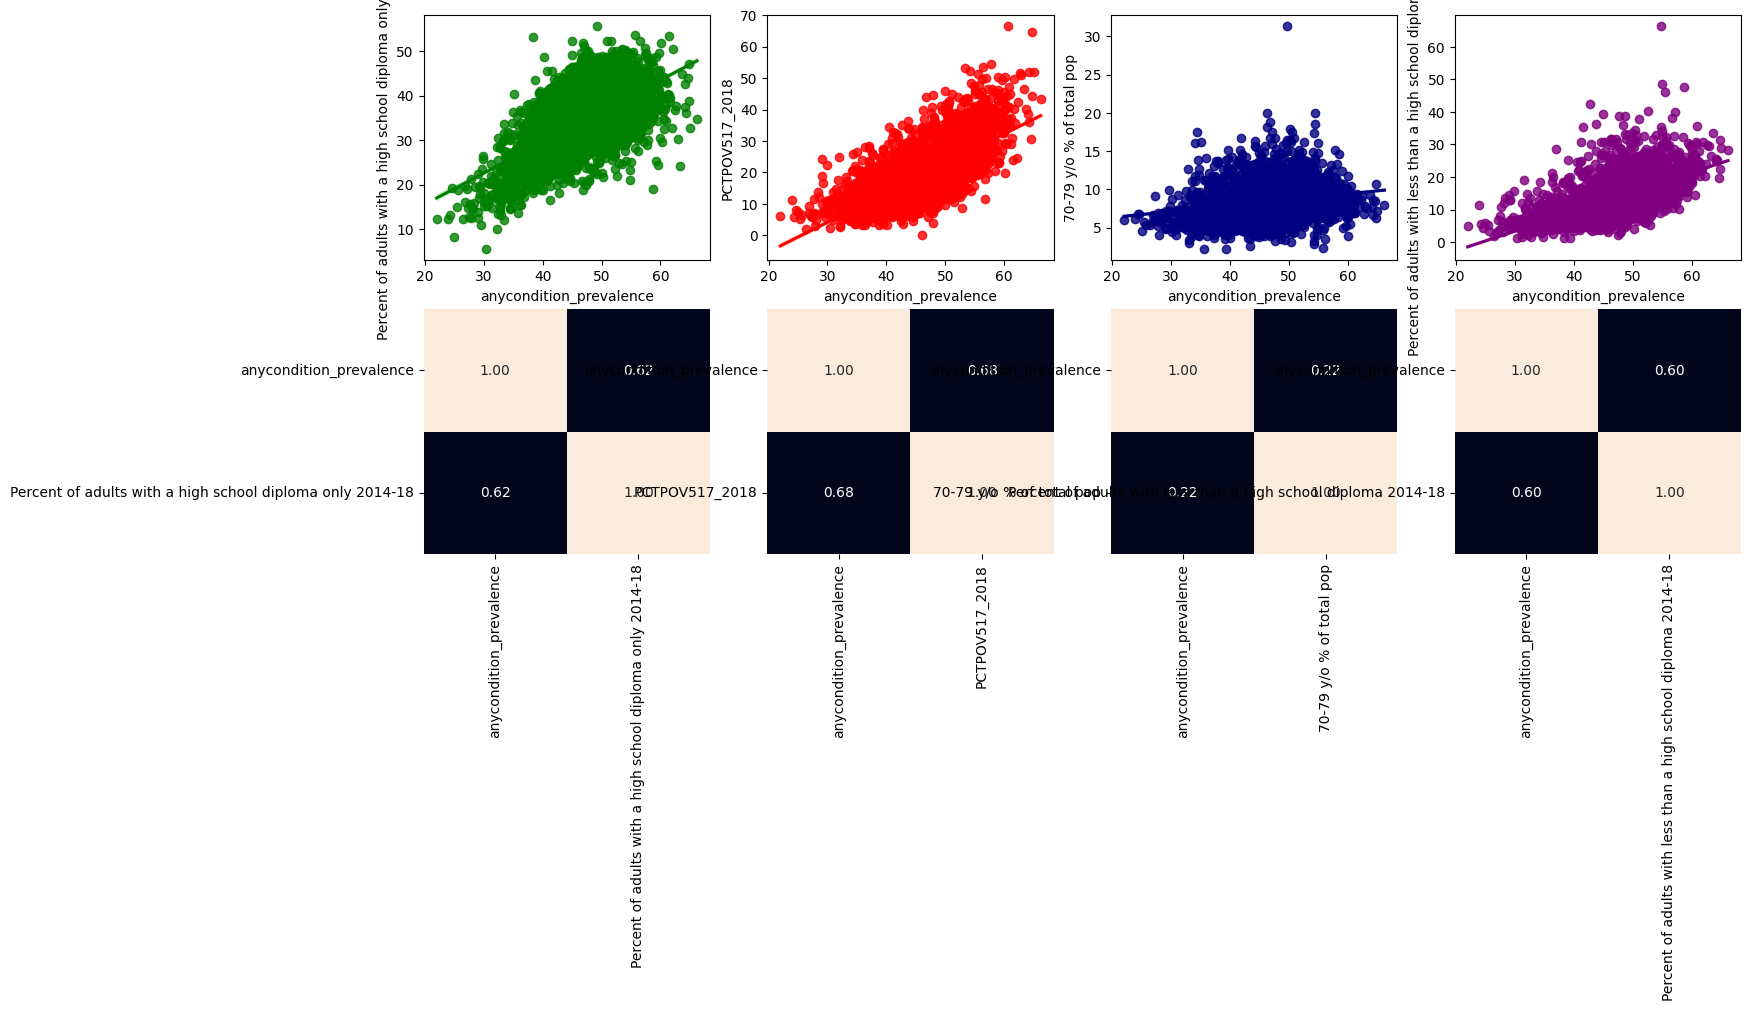

In [30]:
fig, axis = plt.subplots(2, 4, figsize = (17, 7))

sns.regplot(ax = axis[0, 0], data = clean_data, x = "anycondition_prevalence", y = "Percent of adults with a high school diploma only 2014-18", color='green')
sns.heatmap(clean_data[["anycondition_prevalence", "Percent of adults with a high school diploma only 2014-18"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)


sns.regplot(ax = axis[0, 1], data = clean_data, x = "anycondition_prevalence", y = "PCTPOV517_2018", color='red')
sns.heatmap(clean_data[["anycondition_prevalence", "PCTPOV517_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[0, 2], data = clean_data, x = "anycondition_prevalence", y = "70-79 y/o % of total pop", color='navy')
sns.heatmap(clean_data[["anycondition_prevalence", "70-79 y/o % of total pop"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

sns.regplot(ax = axis[0, 3], data = clean_data, x = "anycondition_prevalence", y = "Percent of adults with less than a high school diploma 2014-18", color='purple')
sns.heatmap(clean_data[["anycondition_prevalence", "Percent of adults with less than a high school diploma 2014-18"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 3], cbar = False)



This plot shows us:
- Percent of adults with a high school diploma only, seems to be really related to have any health issue.
- PCTPOV517_2018, the estimate of related children age 5-17 in families in poverty 2018. As the previous plot, is clear that the poverty is related to have any health issue, whatever the age is.
- 70-79 y/o % of total pop, this case is more clear, because as people age, their risk of developing certain chronic diseases and health conditions increases.
- Percent of adults with less than a high school diploma, although it is not clear why, there seems to be a considerable relationship between having little education and suffering from some disease.

Save clean data into csv

In [ ]:
#save clean data
clean_data.to_csv(r"/workspace/Reg-Linear-Regression/data/interim/clean_dataset.csv", index = False)

In [ ]:
#divide the data set into training (train) and testing (test)

X = clean_data.drop('anycondition_prevalence', axis= 1)
y = clean_data['anycondition_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)


In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

#normalize select data

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [ ]:
#Lasso model

lasso_model = Lasso(alpha=1.0, random_state = 28)
lasso_model.fit(X_train_norm, y_train)

Lasso(random_state=28)

In [ ]:
y_pred = lasso_model.predict(X_test_norm)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Metrics for the Lasso model:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Metrics for the Lasso model:
Mean Squared Error (MSE): 1.0053845659082867
R2 Score: 0.9751637457742603


In [ ]:
#ridge model
ridge_model = Ridge(alpha=1.0, random_state = 28)

ridge_model.fit(X_train, y_train)

y_pred2 = ridge_model.predict(X_test)
y_pred2

array([40.26235284, 40.23446119, 47.83354579, 45.3756856 , 54.40801357,
       50.37673249, 61.7348463 , 39.98507887, 46.66895647, 43.14029067,
       35.23670593, 45.142349  , 48.7342495 , 48.86516908, 54.9803036 ,
       49.09410121, 48.30579835, 54.61289327, 44.49341952, 49.54013477,
       36.72521068, 52.47582271, 52.25365862, 40.87176221, 41.13097259,
       43.77164617, 51.58180466, 54.13960275, 44.83553687, 65.00554658,
       31.7358545 , 57.78494529, 43.3024172 , 33.95076276, 52.58160336,
       50.80150616, 47.45292975, 39.13437729, 48.04182724, 40.96638673,
       51.66758167, 53.52720929, 43.71379816, 58.27987585, 50.03813775,
       54.25676777, 43.62376268, 41.67908826, 56.54119756, 46.51698091,
       47.2086858 , 55.01063862, 45.77025533, 32.19425815, 53.45624778,
       48.90342908, 40.05541695, 48.17715005, 51.62894598, 44.54307103,
       47.13879911, 44.44180574, 44.53629082, 50.76680209, 43.07104853,
       51.65117966, 31.05564281, 45.8977037 , 56.50815087, 38.35

In [ ]:
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print('Metrics for the Ridge model:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

Metrics for the Ridge model:
Mean Squared Error (MSE): 0.004177355008201664
R2 Score: 0.9998968058049696


The ridge model give us better score.